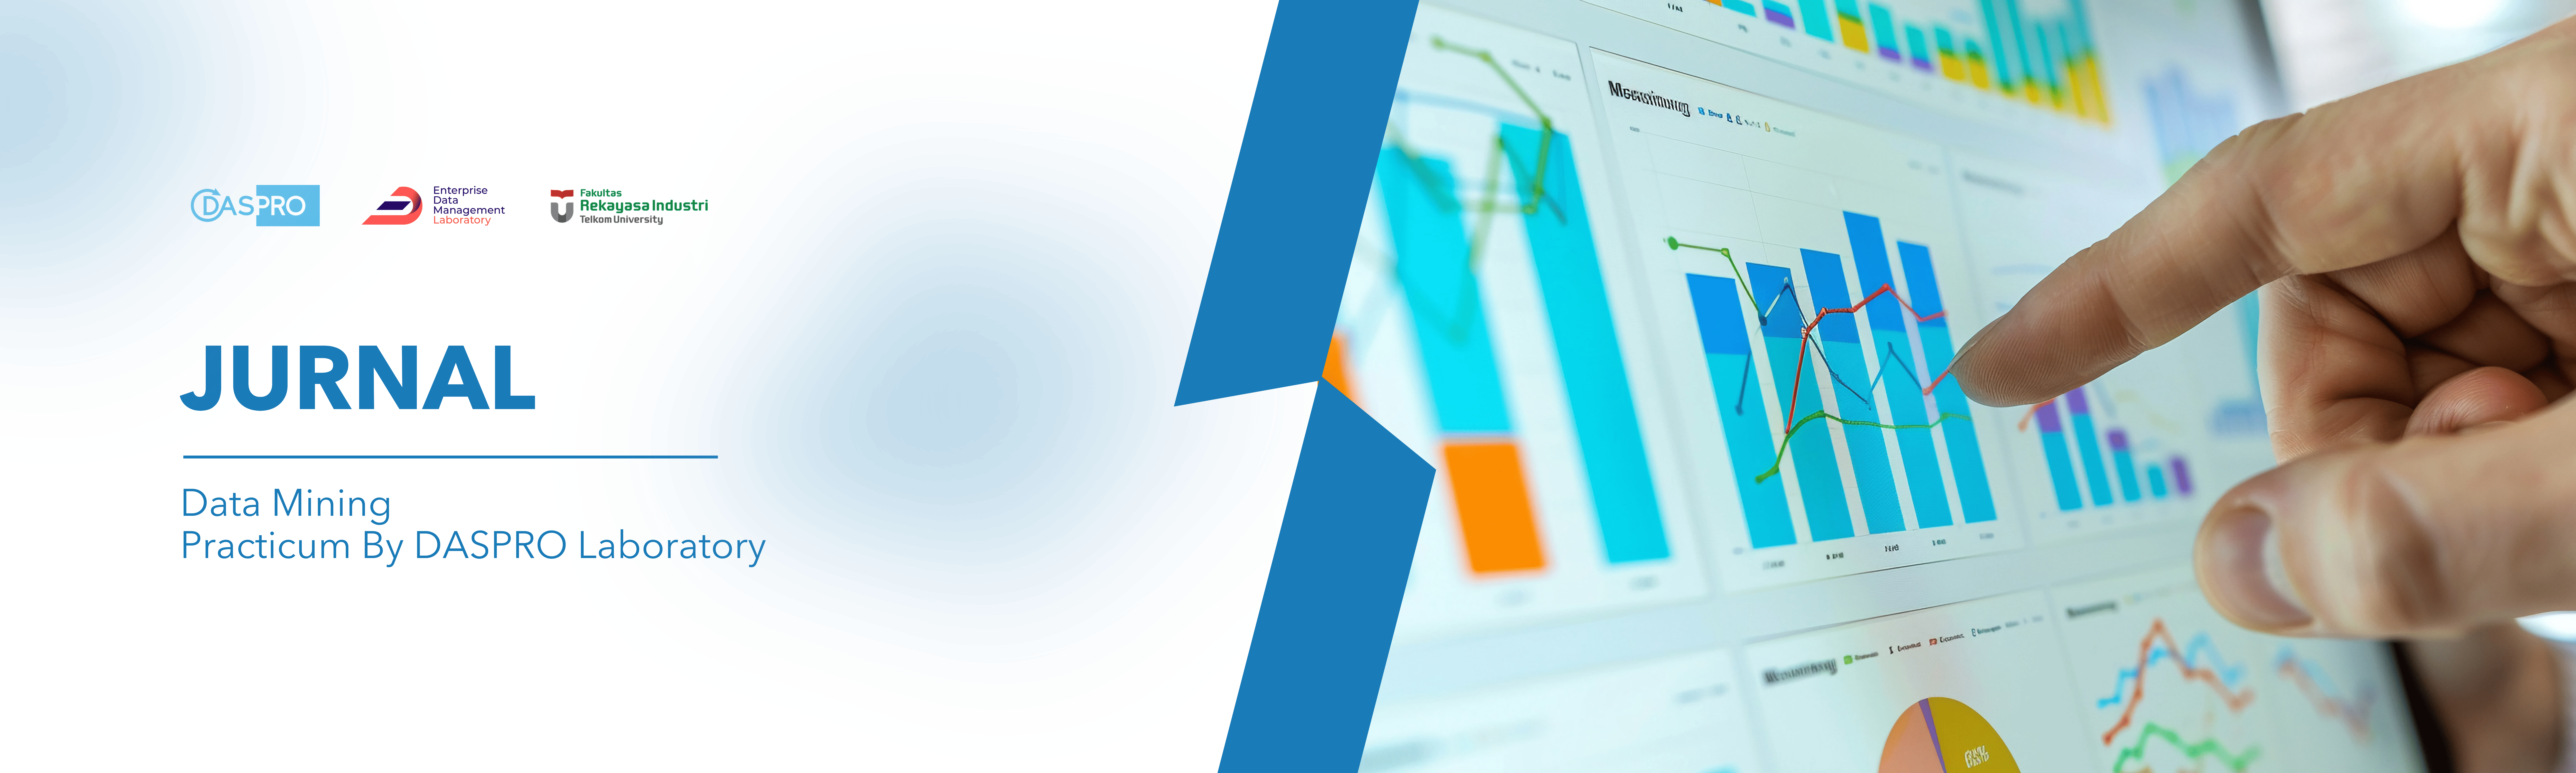

# **JURNAL MODUL 1**



---


**Nama**: Rizky Zaki Zulkarnaen

**NIM**: 102022300080

**Kelas**: SI4706

**Shift**: 7

**Kode Asprak**: KYLE

## **Aturan Pengerjaan dan Pengumpulan JURNAL:**


1. Soal praktikum dikerjakan secara individu 
2. Jawaban tidak boleh sama dengan setiap individu.
3. Pengiriman file latihan soal melalui CeLOE Learning Management System (LMS).
4. Batas pengiriman jawaban sesuai dengan batas waktu di CeLOE Learning Management System (LMS).
5. Format penamaan file .ipynb: 

    **Kode Asisten_JURNALX_NAMA LENGKAP (KAPITAL)_NIM.ipynb**

6. Tidak mengerjakan akan diberikan nilai 0.
7. Kesalahan format penamaan file praktikum akan mendapatkan potongan nilai sebesar 10% per file yang salah.
8. Keterlambatan pengiriman file praktikum akan mendapatkan potongan nilai sebesar 50%.
9. Praktikan Dilarang Bertanya kepada Asisten Praktikum, hanya diperbolehkan membuka modul, namun Dilarang Melakukan Browsing di Google atau Search Engine lain.
10. Terbukti melakukan kecurangan melalui alat bantu AI (ChatGPT, GitHub Copilot, Dll) baik diluar atau didalam praktikum maka nilai modul = 0. 

Segala bentuk atau indikasi kecurangan, mencontek, plagiarism, dan/atau pemalsuan akan dibawa ke Komisi Disiplin dan apabila terbukti nilai modul = 0.

## Studi Kasus

Dalam studi kasus Tugas Pendahuluan, kita akan melakukan berbagai proses Data Cleansing, Data Reduction, Mising Value Handling, dan Data Transformastion pada dataset mobil. Pada dataset ini akan dipelajari implementasi lebih lanjut cara cara pra-pemrosesan data.

### Informasi Dataset

Dataset ini berisi informasi mengenai berbagai mobil, termasuk spesifikasi teknis, fitur keselamatan, dan harga. Berikut informasi kolom-kolom yang terdapat dalam dataset:

1. **ID**: Nomor identifikasi unik untuk setiap data mobil

2. **Price**: Harga mobil dalam satuan mata uang tertentu

3. **Levy**: Biaya pajak/retribusi kendaraan

4. **Manufacturer** : Merek/produsen mobil (contoh: LEXUS, TOYOTA, HONDA, dll)

5. **Model**: Model spesifik dari mobil (contoh: RX 450, Camry, Civic, dll)

6. **Prod. year**: Tahun produksi mobil

7. **Category**: Kategori/jenis mobil (contoh: Jeep, Sedan, Hatchback, dll)

8. **Leather interior**: Status interior kulit (Yes/No)

9. **Fuel type**: Jenis bahan bakar (contoh: Hybrid, Petrol/Bensin, Diesel, CNG, LPG)

10. **Engine volume**: Kapasitas mesin dalam liter

11. **Mileage**: Jarak tempuh kendaraan dalam kilometer

12. **Cylinders**: Jumlah silinder mesin

13. **Gear box type**: Jenis transmisi (contoh: Automatic, Manual, Tiptronic, Variator)

14. **Drive wheels**: Sistem penggerak roda (contoh: 4x4, Front, Rear)

15. **Doors**: Jumlah pintu mobil

16. **Wheel**: Posisi kemudi (Left wheel/Right-hand drive)

17. **Color**: Warna mobil

18. **Airbags**: Jumlah airbag yang terpasang


## 1. Load Data

Pertama, kita akan membaca dataset menggunakan pandas dan menampilkan beberapa baris awal untuk memahami struktur data.

Import library

In [269]:
import pandas as pd

Load data dalam variabel 'df'

In [270]:
df = pd.read_csv('../Resource/dataset_jurnal1.csv')

Tampilkan info data

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19218 non-null  float64
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Tampilkan frekuensi nilai unik di kolom 'Category'

In [272]:
df.value_counts('Category')

Category
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: count, dtype: int64

Tampilkan deskripsi statistik data

In [273]:
df.describe()

ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.921800e+04  19237.000000  19237.000000  19045.000000
mean   4.557654e+07  1.855198e+04   2010.912824      4.582991      6.582148
std    9.365914e+05  1.906745e+05      5.668673      1.199933      4.320365
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.206300e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000

## 2. Data Cleansing

Drop kolom 'ID'

In [274]:
df.drop(columns=['ID'], inplace=True)

### 2.1 Duplikasi data

Cek jumlah duplikasi data

In [275]:
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Jumlah data duplikat: 3466


Drop duplikasi data

In [276]:
df.drop_duplicates(inplace=True)

Cek kembali jumlah duplikasi pada data

In [277]:
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Jumlah data duplikat: 0


### 2.2 Missing Value

Cek nilai null pada data

In [278]:
print(f"Jumlah data yang hilang: {df.isnull().sum().sum()}")

Jumlah data yang hilang: 210


Hapus nilai null pada kolom 'Price'

In [279]:
df.dropna(subset='Price',inplace=True)

Mengisi nilai null pada kolom 'Airbags' dengan nilai mean

In [280]:
df['Airbags'].fillna(df['Airbags'].mean, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_16236\2931422801.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0        12.0
1         8.0
2         2.0
3         0.0
4         4.0
         ... 
19230    12.0
19232     5.0
19233     8.0
19234     4.0
19236    12.0
Name: Airbags, Length: 15752, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Airbags'].fillna(df['Airbags'].mean, inplace=True)


Cek kembali apakah masih terdapat nilai null pada data

In [281]:
print(f"Jumlah data yang hilang: {df.isnull().sum().sum()}")

Jumlah data yang hilang: 0


### 2.3 Data Outlier

Buat grafik boxplot untuk menampilkan data outlier

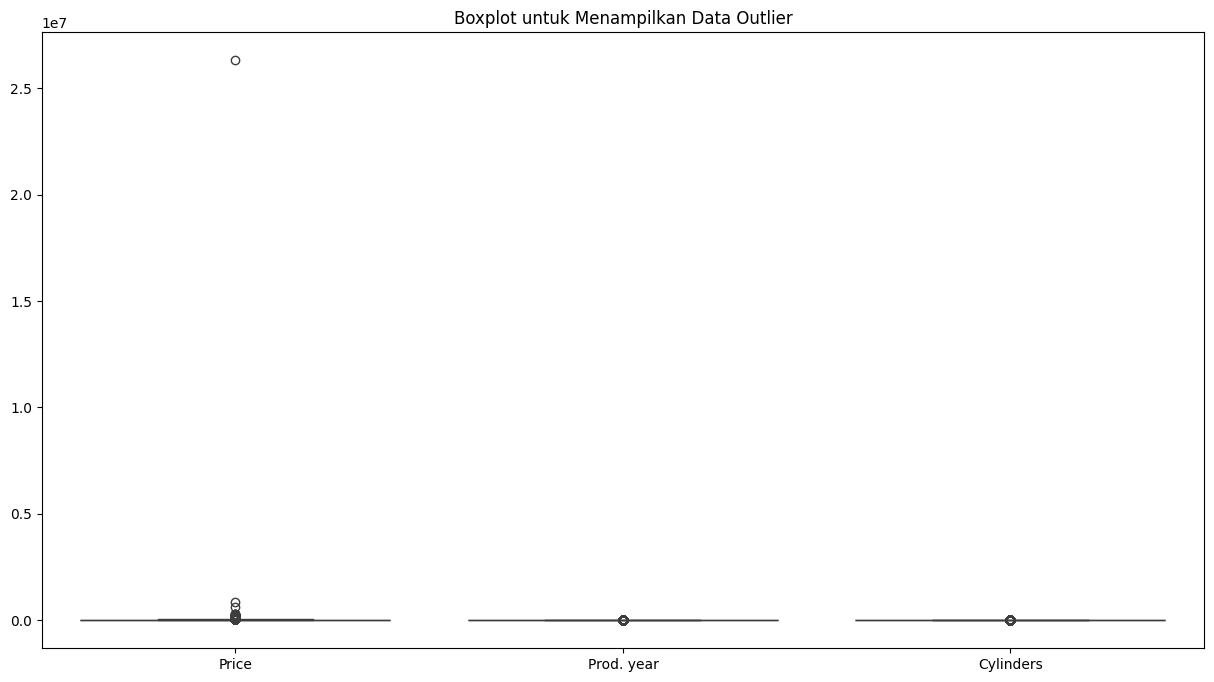

In [282]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title('Boxplot untuk Menampilkan Data Outlier')
plt.show()

Drop data outlier pada kolom 'Price', 'Prod. year', 'Cylinders' dengan menggunakan Inter Quartil Range (IQR)

In [283]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df = remove_outliers_iqr(df, 'Price')
df = remove_outliers_iqr(df, 'Prod. year')
df = remove_outliers_iqr(df, 'Cylinders')

Cek kembali apakah masih terdapat data outlier

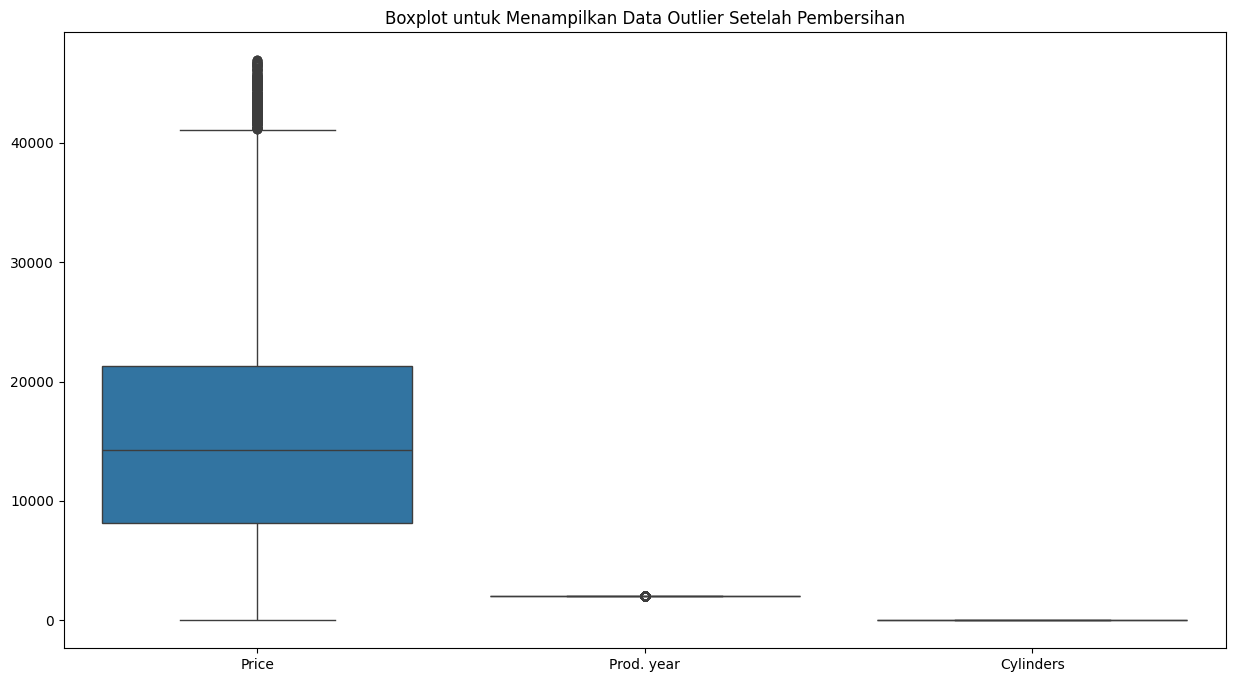

In [284]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['Price', 'Prod. year', 'Cylinders']])
plt.title('Boxplot untuk Menampilkan Data Outlier Setelah Pembersihan')
plt.show()

**Jelaskan insight yang kamu dapat dari pengerjaan di atas**

///Jawab///

## 3. Data Reduction

### 3.1 Feature Selection

Pilih kolom ['Price', 'Prod. year', 'Cylinders'] dan simpan ke dalam variabel baru

In [285]:
new_variable_columns = df[['Price', 'Prod. year', 'Cylinders']]

### 3.2 Normalisasi Data

Normalisasikan data di variabel baru menggunakan StandardScaler

In [286]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(new_variable_columns)
normalized_df = pd.DataFrame(normalized_data, columns=new_variable_columns.columns)
print(normalized_df.head())

      Price  Prod. year  Cylinders
0 -0.673168   -1.279355        0.0
1 -1.121117   -0.135116        0.0
2 -0.372784    0.551427        0.0
3  2.186518    1.009123        0.0
4 -1.287393   -0.363964        0.0


### 3.3 PCA

Gunakan PCA untuk mereduksi data 5 dimensi menjadi 2 dimensi

In [287]:
from sklearn.decomposition import PCA

new_variable_columns = new_variable_columns.dropna()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(new_variable_columns)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
print(pca_df.head())

            PC1       PC2
0  -7303.495422 -4.546332
1 -12163.494657  1.148439
2  -4044.494311  2.987770
3  23722.505691  1.018280
4 -13967.494782  0.406334


Tampilkan data sebelum dan data setelah pengimplementasian PCA

In [288]:
print("Data Before PCA:")
print(new_variable_columns.head())
print("\nData After PCA:")
print(pca_df.head())

Data Before PCA:
     Price  Prod. year  Cylinders
2   8467.0        2006        4.0
3   3607.0        2011        4.0
4  11726.0        2014        4.0
5  39493.0        2016        4.0
6   1803.0        2010        4.0

Data After PCA:
            PC1       PC2
0  -7303.495422 -4.546332
1 -12163.494657  1.148439
2  -4044.494311  2.987770
3  23722.505691  1.018280
4 -13967.494782  0.406334


### 3.4 Sampling

Cek total data keseluruhan

In [289]:
print(f"Total data keseluruhan: {len(df)}")

Total data keseluruhan: 11126


Lakukan sampling dengan data sebanyak 60% dengan kode random_state 42

In [290]:
sampled_data = df.sample(frac=0.6, random_state=42)
print(f"Total data sample: {len(sampled_data)}")

Total data sample: 6676


Cek total data sample

In [291]:
print(f"Total data sample: {len(sampled_data)}")

Total data sample: 6676


**Jelaskan insight yang kamu dapat dari pengerjaan di atas**

Dari pengerjaan di atas, beberapa insight yang dapat diperoleh adalah:

1. **Data Cleansing**:
  - Proses pembersihan data seperti menghapus duplikasi, menangani nilai yang hilang, dan menghapus outlier membantu meningkatkan kualitas data sehingga analisis menjadi lebih akurat.
  - Mengisi nilai null dengan rata-rata pada kolom tertentu memastikan data tetap konsisten tanpa kehilangan informasi penting.

2. **Data Reduction**:
  - Dengan melakukan feature selection, kita dapat fokus pada kolom yang relevan, seperti 'Price', 'Prod. year', dan 'Cylinders', sehingga analisis menjadi lebih efisien.
  - Normalisasi data menggunakan StandardScaler membantu menyamakan skala antar fitur, yang penting untuk algoritma berbasis jarak.
  - PCA berhasil mereduksi dimensi data dari 3 menjadi 2, yang dapat mempermudah visualisasi dan analisis lebih lanjut tanpa kehilangan informasi signifikan.

3. **Sampling**:
  - Sampling data sebanyak 60% memungkinkan pengolahan data yang lebih cepat tanpa mengorbankan representasi keseluruhan dataset.

Proses ini menunjukkan pentingnya pra-pemrosesan data untuk memastikan data yang digunakan dalam analisis atau model machine learning memiliki kualitas yang baik dan relevan.

## 4. Data Transformation

### 4.1 Normalization (Min-Max Scaling)

Normalisasikan kolom 'Price' menggunakan Min-Max Scaling

In [292]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df['Price_normalized'] = min_max_scaler.fit_transform(df[['Price']])

print(df[['Price', 'Price_normalized']].head())

     Price  Price_normalized
2   8467.0          0.180442
3   3607.0          0.076857
4  11726.0          0.249904
5  39493.0          0.841724
6   1803.0          0.038407


Tampilkan data setelah dinormalisasi

In [293]:
print(normalized_df.head())

      Price  Prod. year  Cylinders
0 -0.673168   -1.279355        0.0
1 -1.121117   -0.135116        0.0
2 -0.372784    0.551427        0.0
3  2.186518    1.009123        0.0
4 -1.287393   -0.363964        0.0


### 4.2 Data Encoding

Ubah tipe data kolom 'Wheel' menjadi format numerik menggunakan One-Hot Encoding

In [294]:
df_encoded = pd.get_dummies(df, columns=['Wheel'], prefix='Wheel')

Tampilkan data setelah encoding

In [295]:
print(df_encoded.head())

     Price Levy Manufacturer     Model  Prod. year   Category  \
2   8467.0    -        HONDA       FIT        2006  Hatchback   
3   3607.0  862         FORD    Escape        2011       Jeep   
4  11726.0  446        HONDA       FIT        2014  Hatchback   
5  39493.0  891      HYUNDAI  Santa FE        2016       Jeep   
6   1803.0  761       TOYOTA     Prius        2010  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   
5              Yes    Diesel             2  160931 km        4.0   
6              Yes    Hybrid           1.8  258909 km        4.0   

  Gear box type Drive wheels   Doors   Color Airbags  Price_normalized  \
2      Variator        Front  04-May   Black     2.0          0.180442   
3     Automatic          4x4  04-May   White     0.0

### 4.3 Discretization (Binning)

Normalisasikan data kolom 'Price'

In [296]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df['Price_normalized'] = min_max_scaler.fit_transform(df[['Price']])
print(df[['Price', 'Price_normalized']].head())

     Price  Price_normalized
2   8467.0          0.180442
3   3607.0          0.076857
4  11726.0          0.249904
5  39493.0          0.841724
6   1803.0          0.038407


Tampilkan data setelah binning

In [297]:
bins = [0, 5000, 15000, 30000, 50000, float('inf')]
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat tinggi']
df['Price_binned'] = pd.cut(df['Price'], bins=bins, labels=labels)

print(df[['Price', 'Price_binned']].head())

     Price   Price_binned
2   8467.0         Rendah
3   3607.0  Sangat Rendah
4  11726.0         Rendah
5  39493.0         Tinggi
6   1803.0  Sangat Rendah


**Jelaskan insight yang kamu dapat dari pengerjaan di atas**

**Insight dari Data Transformation:**

1. **Normalization (Min-Max Scaling)**:
  - Normalisasi menggunakan Min-Max Scaling membantu mengubah skala data ke rentang [0, 1], sehingga mempermudah algoritma machine learning untuk bekerja secara optimal, terutama yang sensitif terhadap skala data seperti KNN atau Gradient Descent.

2. **Data Encoding**:
  - Proses encoding pada kolom 'Wheel' mengubah data kategorikal menjadi format numerik (One-Hot Encoding), yang diperlukan untuk algoritma machine learning karena sebagian besar algoritma tidak dapat bekerja langsung dengan data kategorikal.

3. **Discretization (Binning)**:
  - Dengan melakukan binning pada kolom 'Price', kita dapat mengelompokkan data harga ke dalam kategori tertentu seperti 'Sangat Rendah', 'Rendah', 'Sedang', dll. Hal ini mempermudah analisis data dan interpretasi hasil, terutama untuk memahami distribusi harga dalam dataset.

Secara keseluruhan, proses transformasi data ini meningkatkan kualitas data dan mempersiapkannya untuk analisis atau model machine learning dengan lebih baik.